<a href="https://colab.research.google.com/github/manisharavindh/basic-pytorch-models/blob/main/notebooks/02_binary_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


In [43]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [44]:
# toy dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,
                  noise=0.01,
                  random_state=43)

X[:5], y[:5]

(array([[ 1.64620597e+00, -2.76991382e-01],
        [ 1.99155871e+00,  4.12168229e-01],
        [ 4.09507881e-01,  9.21021903e-01],
        [-1.83348058e-03,  4.97940416e-01],
        [ 7.73472994e-01, -4.77243710e-01]]),
 array([1, 1, 0, 1, 1]))

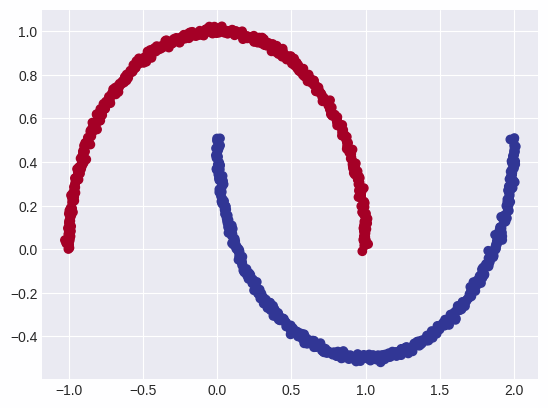

In [45]:
# visualization
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap='RdYlBu')

In [46]:
# data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [47]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# model
from torch import nn

class MoonsModel(nn.Module):
  def __init__(self, input_units, output_units, hidden_units=10):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=input_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_units)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layers(x)

model = MoonsModel(input_units=2, output_units=1, hidden_units=10).to(device)
model

MoonsModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [49]:
# loss fun, optimizer and accuray fun
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

def acc_fn(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  return (correct/len(y_pred))*100

In [50]:
# training loop
torch.manual_seed(42)

epochs = 100

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69542 | Acc: 37.25% | Test Loss: 0.64504 | Test Acc: 48.00%
Epoch: 10 | Loss: 0.27579 | Acc: 87.12% | Test Loss: 0.15741 | Test Acc: 96.00%
Epoch: 20 | Loss: 0.21364 | Acc: 89.75% | Test Loss: 0.13231 | Test Acc: 95.50%
Epoch: 30 | Loss: 0.07806 | Acc: 98.62% | Test Loss: 0.05423 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.00261 | Acc: 100.00% | Test Loss: 0.00170 | Test Acc: 100.00%
Epoch: 50 | Loss: 0.00038 | Acc: 100.00% | Test Loss: 0.00035 | Test Acc: 100.00%
Epoch: 60 | Loss: 0.00014 | Acc: 100.00% | Test Loss: 0.00007 | Test Acc: 100.00%
Epoch: 70 | Loss: 0.00008 | Acc: 100.00% | Test Loss: 0.00005 | Test Acc: 100.00%
Epoch: 80 | Loss: 0.00007 | Acc: 100.00% | Test Loss: 0.00005 | Test Acc: 100.00%
Epoch: 90 | Loss: 0.00006 | Acc: 100.00% | Test Loss: 0.00004 | Test Acc: 100.00%


In [51]:
# predictions
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(X_test).squeeze()))

y_preds[:5], y_test[:5]

(tensor([0., 0., 1., 1., 0.]), tensor([0., 0., 1., 1., 0.]))

In [52]:
# data visualization imports
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download!")
else:
  print("downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download!


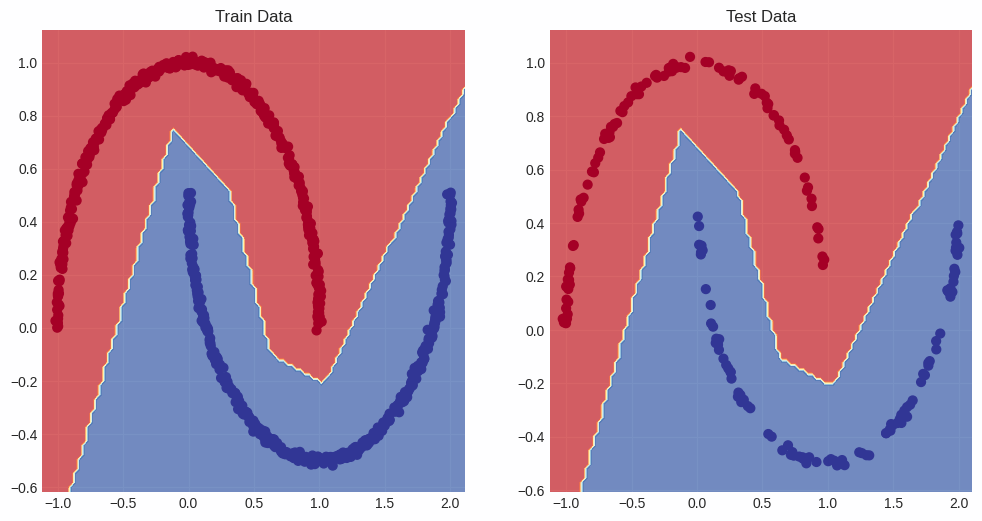

In [53]:
# plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train Data')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test Data')
plot_decision_boundary(model, X_test, y_test)

In [55]:
# saving the model
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_binary_classification_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(
    obj=model.state_dict(),
    f=MODEL_SAVE_PATH
)
print(f"model saved to: {MODEL_SAVE_PATH}")

model saved to: models/02_binary_classification_model.pth
